In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt
import json

In [46]:
logins=pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [47]:
# login_time    93142 non-null datetime64[ns]
# dtypes: datetime64[ns](1)
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


## Part 1 : Exploratory Data Analysis 

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location.

- Aggregate these logins counts based on 15-minute time intervals
- Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand
- Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

### Aggregate these logins counts based on 15-minute time intervals

In [48]:
logins.set_index(keys='login_time',inplace=True)
logins['count']=1
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [49]:
logins_sampled_15min=logins.resample('15min').sum()
logins_sampled_15min.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

In [50]:
logins_sampled_15min.reset_index(inplace=True)
logins_sampled_15min.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


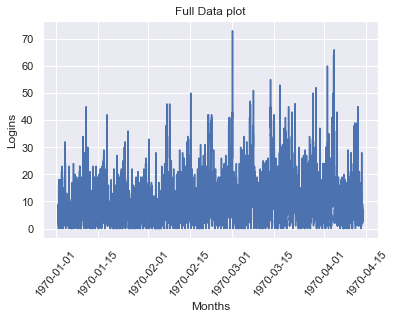

In [51]:
x=logins_sampled_15min['login_time']
y=logins_sampled_15min['count']
plt.plot(x,y)
plt.title('Full Data plot')
plt.xticks(rotation=50)
plt.xlabel('Months')
plt.ylabel('Logins')
plt.show()

In [52]:
# Show graph by date , dayof week and time of day
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [53]:
logins.reset_index(inplace=True)
logins.head()

,login_time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [54]:
# logins.login_time.apply(lambda x : x.hour)
logins['date']=logins['login_time'].dt.date
logins['weekday']=logins['login_time'].dt.weekday
logins['hour']=logins['login_time'].dt.hour
logins.head()

,login_time,count,date,weekday,hour
0,1970-01-01 20:13:18,1,1970-01-01,3,20
1,1970-01-01 20:16:10,1,1970-01-01,3,20
2,1970-01-01 20:16:37,1,1970-01-01,3,20
3,1970-01-01 20:16:36,1,1970-01-01,3,20
4,1970-01-01 20:26:21,1,1970-01-01,3,20


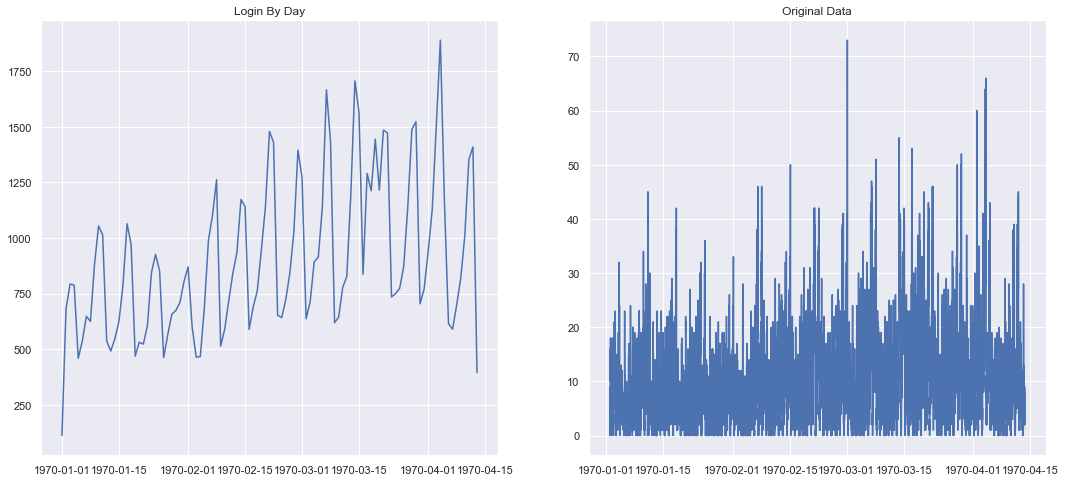

In [55]:
by_date=logins['date'].value_counts().sort_index()
by_date=by_date.reset_index()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,8))
ax1.plot(by_date['index'],by_date['date'])
ax2.plot(x,y)

ax1.set_title('Login By Day')
ax2.set_title('Original Data')
plt.show()

In [56]:
by_weekday=logins['weekday'].value_counts().sort_index()
by_weekday=by_weekday.reset_index()
by_weekday['index']=['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
by_weekday


,index,weekday
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


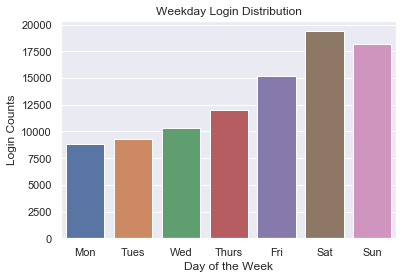

In [57]:
sns.barplot(x= 'index', y='weekday', data=by_weekday)
plt.xlabel('Day of the Week')
plt.title('Weekday Login Distribution')
plt.ylabel('Login Counts')
plt.show()

In [58]:
by_hour=logins['hour'].value_counts().sort_index()
by_hour=by_hour.reset_index()
by_hour

,index,hour
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


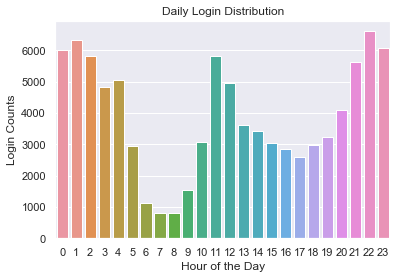

In [59]:
sns.barplot(x= 'index', y='hour', data=by_hour)
plt.xlabel('Hour of the Day')
plt.title('Daily Login Distribution')
plt.ylabel('Login Counts')
plt.show()

## Part 2 : Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs.

Question 1: What woud you choose as the key measure of success of this experiment in encouraging driver partners to server both cities, and why would you choose this metric?

Question 2: Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

-  How you will implement the experiment
-  What statistical test(s) you will conduct to verify the significance of the observation
-  How would you interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer 1 :** The most obvious metric for success will be profit, but other metrics include:

- Positive User Feedback
- More traffic in cities, which may lead to indirect profit of neighboring stores or restaraunts
- Increase signups and registration of users
- Less wait times
- There's many reasons to choose a metric, and it ultimately comes down to what the city needs. I believe that creating these tolls roads will hopefully increase the awareness about the benefits of driver partners. The goal is to save time and increase productivity

**Answer 2 :** One simple experiment that we can perform is to conduct an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time.

A statistical test that we can use is applying a t-test, with a p-value of (0.5).

There's three ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there.

In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

## Part 3 : Predictive Modelling

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

In [60]:
#pd.read_json('ultimate_data_challenge.json').head()

In [61]:
file=open('ultimate_data_challenge.json','r')
df=pd.DataFrame(json.load(file))
file.close()
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [62]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Check missing values

- avg_rating_by_driver (impute missing value with 5)
- avg_rating_of_driver (imput missing value with 5)
- phone 

In [64]:
df.count()

avg_dist                  50000
avg_rating_by_driver      49799
avg_rating_of_driver      41878
avg_surge                 50000
city                      50000
last_trip_date            50000
phone                     49604
signup_date               50000
surge_pct                 50000
trips_in_first_30_days    50000
ultimate_black_user       50000
weekday_pct               50000
dtype: int64

### Convert dates into datetime objects

In [65]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [66]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Check the last date and create the label 'active_30'

The last date in the dataset is July 1, 2014. So we can create a label for active users that fall within June 1 - July 1

In [67]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [68]:
# Create a new column and set its values to nan
df['active_30'] = np.nan

In [69]:
# Active users will have a value of 1 if they were active within the past 30 days
df.loc[df['last_trip_date'] >= "2014-06-01", "active_30"] = 1

In [70]:
# Inactive users otherwise
df.loc[df['last_trip_date'] < "2014-06-01", "active_30"] = 0

In [71]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0


In [72]:
df['active_30'] = df['active_30'].convert_objects(convert_numeric=True)

C:\Users\Pratik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


## Check proportion of active to inactive users

**Summary:**
- Looks like about **37.6%** of users are active in the dataset
- This can be seen as a class imbalance problem.
- The most correlated features associated with active users are **'trips_in_first_30_days'** and **'ultimate_black_user'**

In [73]:
df['active_30'].value_counts()

0.0    31196
1.0    18804
Name: active_30, dtype: int64

In [74]:
df['active_30'].value_counts(True)

0.0    0.62392
1.0    0.37608
Name: active_30, dtype: float64

In [75]:
# Overview of summary (Active V.S. Non-Active)
turnover_Summary = df.groupby('active_30')
turnover_Summary.mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
active_30,,,,,,,,
0.0,6.207939,4.787464,4.607557,1.075339,8.666739,1.658482,0.299942,60.647032
1.0,5.114788,4.762772,4.592930,1.073809,9.152797,3.306318,0.505052,61.389034


## Correlation Matrix and Heatmap

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,-0.026791
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,-0.011653
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active_30,-0.092780,-0.026791,-0.011653,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


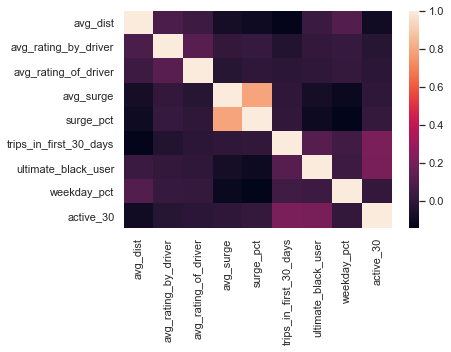

In [76]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

Text(0, 0.5, 'Percentage')

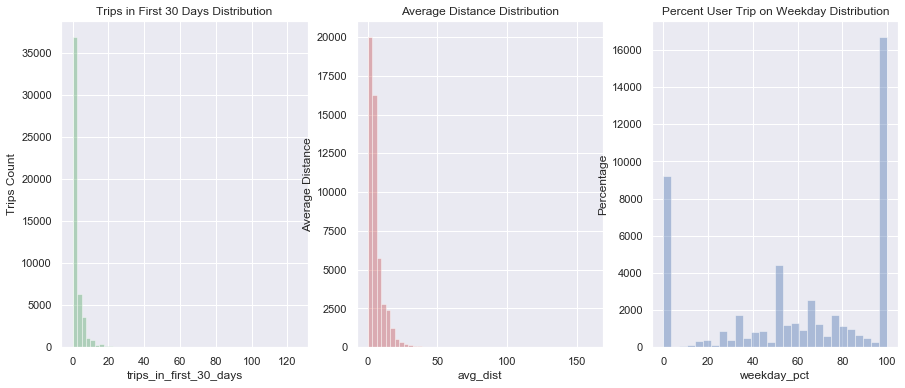

In [77]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['trips_in_first_30_days'], kde=False, color="g", ax=axes[0]).set_title('Trips in First 30 Days Distribution')
axes[0].set_ylabel('Trips Count')

# Graph Employee Evaluation
sns.distplot(df['avg_dist'], kde=False, color="r", ax=axes[1]).set_title('Average Distance Distribution')
axes[1].set_ylabel('Average Distance')

# Graph Employee Average Monthly Hours
sns.distplot(df['weekday_pct'], kde=False, color="b", ax=axes[2]).set_title('Percent User Trip on Weekday Distribution')
axes[2].set_ylabel('Percentage')

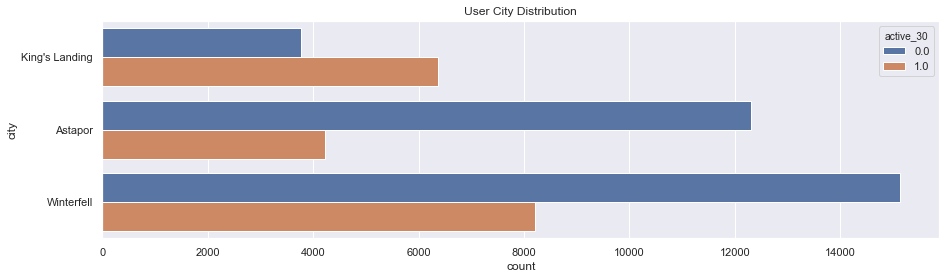

In [78]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="city", hue='active_30', data=df).set_title('User City Distribution');

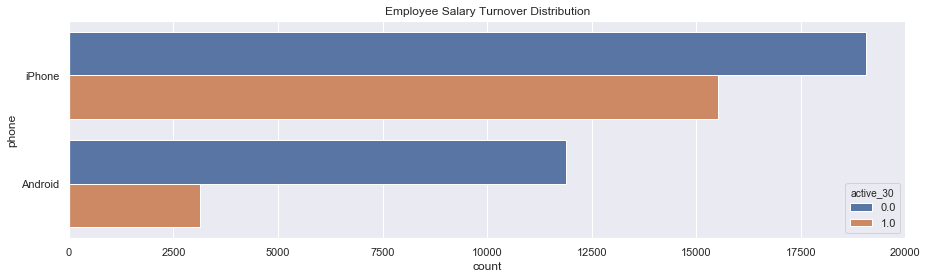

In [79]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="phone", hue='active_30', data=df).set_title('Employee Salary Turnover Distribution');

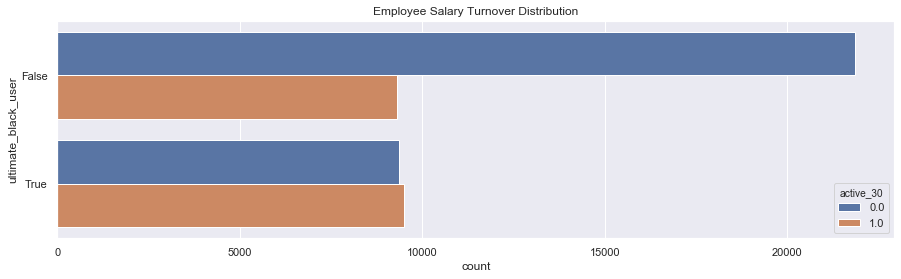

In [80]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="ultimate_black_user", hue='active_30', data=df).set_title('Employee Salary Turnover Distribution');

C:\Users\Pratik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Pratik\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Average Rating of Driver Distribution - Turnover V.S. No Turnover')

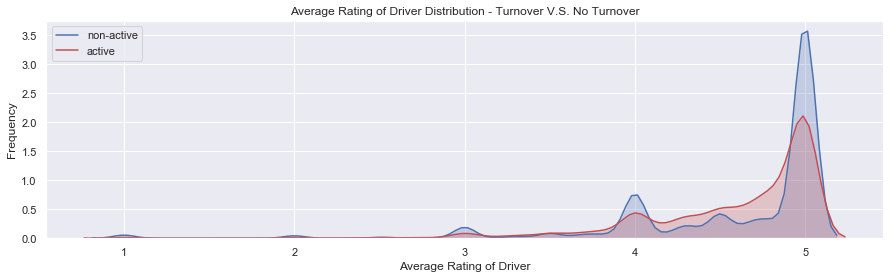

In [81]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['active_30'] == 0),'avg_rating_of_driver'] , color='b',shade=True,label='non-active')
ax=sns.kdeplot(df.loc[(df['active_30'] == 1),'avg_rating_of_driver'] , color='r',shade=True, label='active')
ax.set(xlabel='Average Rating of Driver', ylabel='Frequency')
plt.title('Average Rating of Driver Distribution - Turnover V.S. No Turnover')

## Create New Features ('Signup 'Day')

In [82]:
df['signup_day'] = df['signup_date'].dt.day

In [83]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6


**Pre-Processing Requirements:**
- Convert Categorical Variables Accordingly (city, phone, ultimate_black_user)
- Scale all numerical features?

In [84]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,27


## Data Imputation (Fill in Missing Values)

We filled in the average ratings with 5's because it's the most common value in the dataset. As for phones, I imputed 'none' because some people may not have either an iPhone or Android.

In [85]:
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(5)

In [86]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(5)

In [87]:
df['phone'] = df['phone'].fillna('none')

In [88]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30,signup_day
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0,25
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0,29
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0,6
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0,10
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0,27


## Pre-Processing (OneHotEncoding)

Convert these categorical variables using OneHotEncoding:
- city
- phone
- ultimate_black_user
- signup_month
- signup_day

In [89]:
newdf = pd.get_dummies(df, columns=['city', 'ultimate_black_user', 'phone', 'signup_day'], drop_first=True)

In [90]:
newdf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,active_30,...,signup_day_22,signup_day_23,signup_day_24,signup_day_25,signup_day_26,signup_day_27,signup_day_28,signup_day_29,signup_day_30,signup_day_31
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1.0,...,0,0,0,1,0,0,0,0,0,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0.0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
newdf.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

# Feature Importance

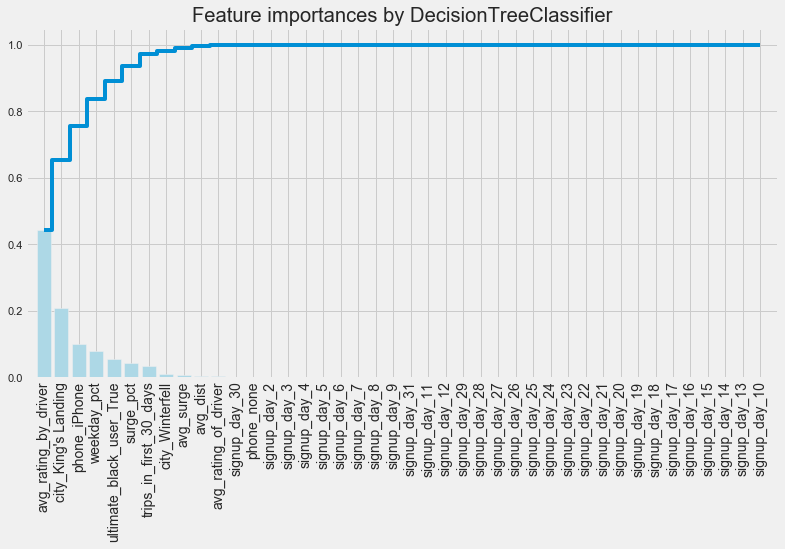

In [92]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)


# Create train and test splits
target_name = 'active_30'
X = newdf.drop('active_30', axis=1)


y=newdf[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = newdf.drop(['active_30'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
              precision    recall  f1-score   support

         0.0       0.62      1.00      0.77      4679
         1.0       0.00      0.00      0.00      2821

    accuracy                           0.62      7500
   macro avg       0.31      0.50      0.38      7500
weighted avg       0.39      0.62      0.48      7500



C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Pratik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




 ---Logistic Model---
Logistic AUC = 0.69
              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      4679
         1.0       0.59      0.66      0.62      2821

    accuracy                           0.70      7500
   macro avg       0.68      0.69      0.69      7500
weighted avg       0.71      0.70      0.70      7500



 ---Decision Tree Model---
Decision Tree AUC = 0.75
              precision    recall  f1-score   support

         0.0       0.83      0.76      0.80      4679
         1.0       0.65      0.75      0.70      2821

    accuracy                           0.76      7500
   macro avg       0.74      0.75      0.75      7500
weighted avg       0.77      0.76      0.76      7500



 ---Random Forest Model---
Random Forest AUC = 0.76
              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82      4679
         1.0       0.71      0.69      0.70      2821

    accuracy                  

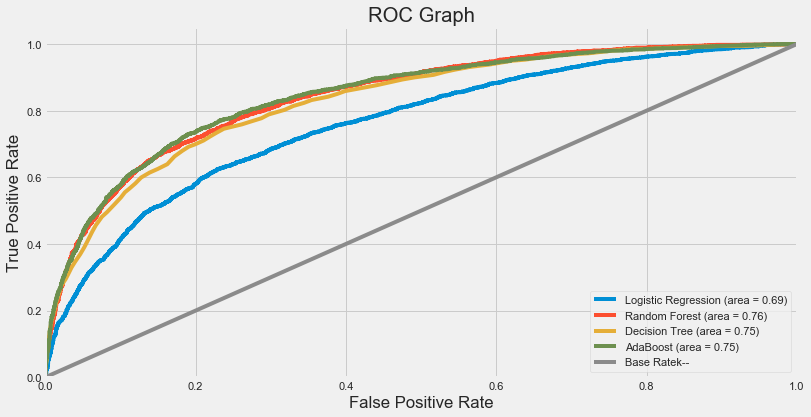

In [94]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Conclusion

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term frider retention (again, a few sentences will suffice).

***

I used four different types of algorithms for my predictive model (Logistic Regression, Random Forest, Decision Tree, and AdaBoost). It's no surprise that the more sophisticated models like Random Forest and AdaBoost performed better than its counterparts. With F1-Score of about 75-78%, these predictions aren't too bad. 

Also, from the feature importance, we can help improve rider retention by optimizing plans on cities and phones. King's Landing has a very high importance and we can probably look in deeper into this city to understand what makes it different from the rest. Phone type also plays an important role. We can look further into this because maybe iPhone users may have certain apps or features that Android users don't.